In [42]:
import sys
from pandas import read_excel, to_datetime
import seaborn as sb
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import datetime as dt

In [43]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [44]:
origin = read_excel('C:/Users/J/Desktop/Data_Science/Class/D.탐색적데이터분석/수업data/연구과제데이터/covid19_full.xlsx')
origin['날짜'] = to_datetime(origin['날짜'])
origin.dtypes

날짜            datetime64[ns]
서울시 누적 확진자             int64
서울시 일일 확진            float64
서울시 치료중                int64
서울시 퇴원               float64
서울시 추가 퇴원            float64
서울시 누적 사망              int64
서울시 일일 사망            float64
전국 누적 확진             float64
전국 일일 확진             float64
전국 치료중                 int64
전국 퇴원                float64
전국 당일 사망             float64
전국 누적 사망               int64
dtype: object

In [45]:
input_date = input('날짜를 입력하세요: (ex) 20240111')
input_date

'20211001'

In [46]:
start_date = dt.datetime.strptime(input_date,'%Y%m%d')
print(type(start_date))
print(start_date)

<class 'datetime.datetime'>
2021-10-01 00:00:00


In [47]:
delta = dt.timedelta(days=6)
end_date=start_date+delta
print(type(end_date))
print(end_date)


<class 'datetime.datetime'>
2021-10-07 00:00:00


In [48]:
# query_df = origin.query('날짜 >= @start_date and 날짜 <= @end_date')
query_df = origin.query('@start_date <= 날짜 <= @end_date')
df = query_df.sort_values('날짜')
df

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
607,2021-10-01,101411,916.0,14332,86430.0,529.0,649,NaN,313773.0,2486.0,35700,275576.0,NaN,2497
606,2021-10-02,102204,793.0,14561,86990.0,560.0,653,NaN,316020.0,2248.0,36424,277092.0,NaN,2504
605,2021-10-03,102939,736.0,14670,87614.0,624.0,655,NaN,318104.0,2085.0,36750,278847.0,NaN,2507
604,2021-10-04,103512,574.0,14650,88206.0,592.0,656,NaN,319777.0,1673.0,34595,282669.0,NaN,2513
603,2021-10-05,104033,521.0,14786,88585.0,379.0,662,NaN,321352.0,1575.0,34631,284197.0,NaN,2524
602,2021-10-06,104723,690.0,14497,89560.0,975.0,666,NaN,323379.0,2028.0,33803,287040.0,NaN,2536
601,2021-10-07,105558,837.0,14573,90316.0,756.0,669,NaN,325804.0,2427.0,34438,288822.0,NaN,2544


In [49]:
x = list(range(0,len(df['날짜'])))
x

[0, 1, 2, 3, 4, 5, 6]

In [50]:
xticks=[]

for i in df['날짜']:
    xticks.append(i.strftime('%m.%d'))

xticks

['10.01', '10.02', '10.03', '10.04', '10.05', '10.06', '10.07']

In [54]:
서울시_누적_min = df['서울시 누적 확진자'].min()
서울시_누적_min -= int(서울시_누적_min * 0.15)

서울시_누적_max = df['서울시 누적 확진자'].max()
서울시_누적_max += int(서울시_누적_max * 0.05)

서울시_일일_min = df['서울시 일일 확진'].min()
서울시_일일_min -= int(서울시_일일_min * 0.15)

서울시_일일_max = df['서울시 일일 확진'].max()
서울시_일일_max += int(서울시_일일_max * 0.05)


전국_누적_min = df['전국 누적 확진'].min()
전국_누적_min -= int(전국_누적_min * 0.15)

전국_누적_max = df['전국 누적 확진'].max()
전국_누적_max += int(전국_누적_max * 0.05)

전국_일일_min = df['전국 일일 확진'].min()
전국_일일_min -= int(전국_일일_min * 0.15)

전국_일일_max = df['전국 일일 확진'].max()
전국_일일_max += int(전국_일일_max * 0.05)

서울시_누적_max,서울시_누적_min,서울시_일일_max,서울시_일일_min
전국_누적_max,전국_누적_min,전국_일일_max,전국_일일_min

(342094.0, 266708.0, 2610.0, 1339.0)

C:\Users\J\AppData\Local\Temp\ipykernel_26128\1466170461.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(xticks,fontsize=12,rotation=0)
C:\Users\J\AppData\Local\Temp\ipykernel_26128\1466170461.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(xticks,fontsize=12,rotation=0)


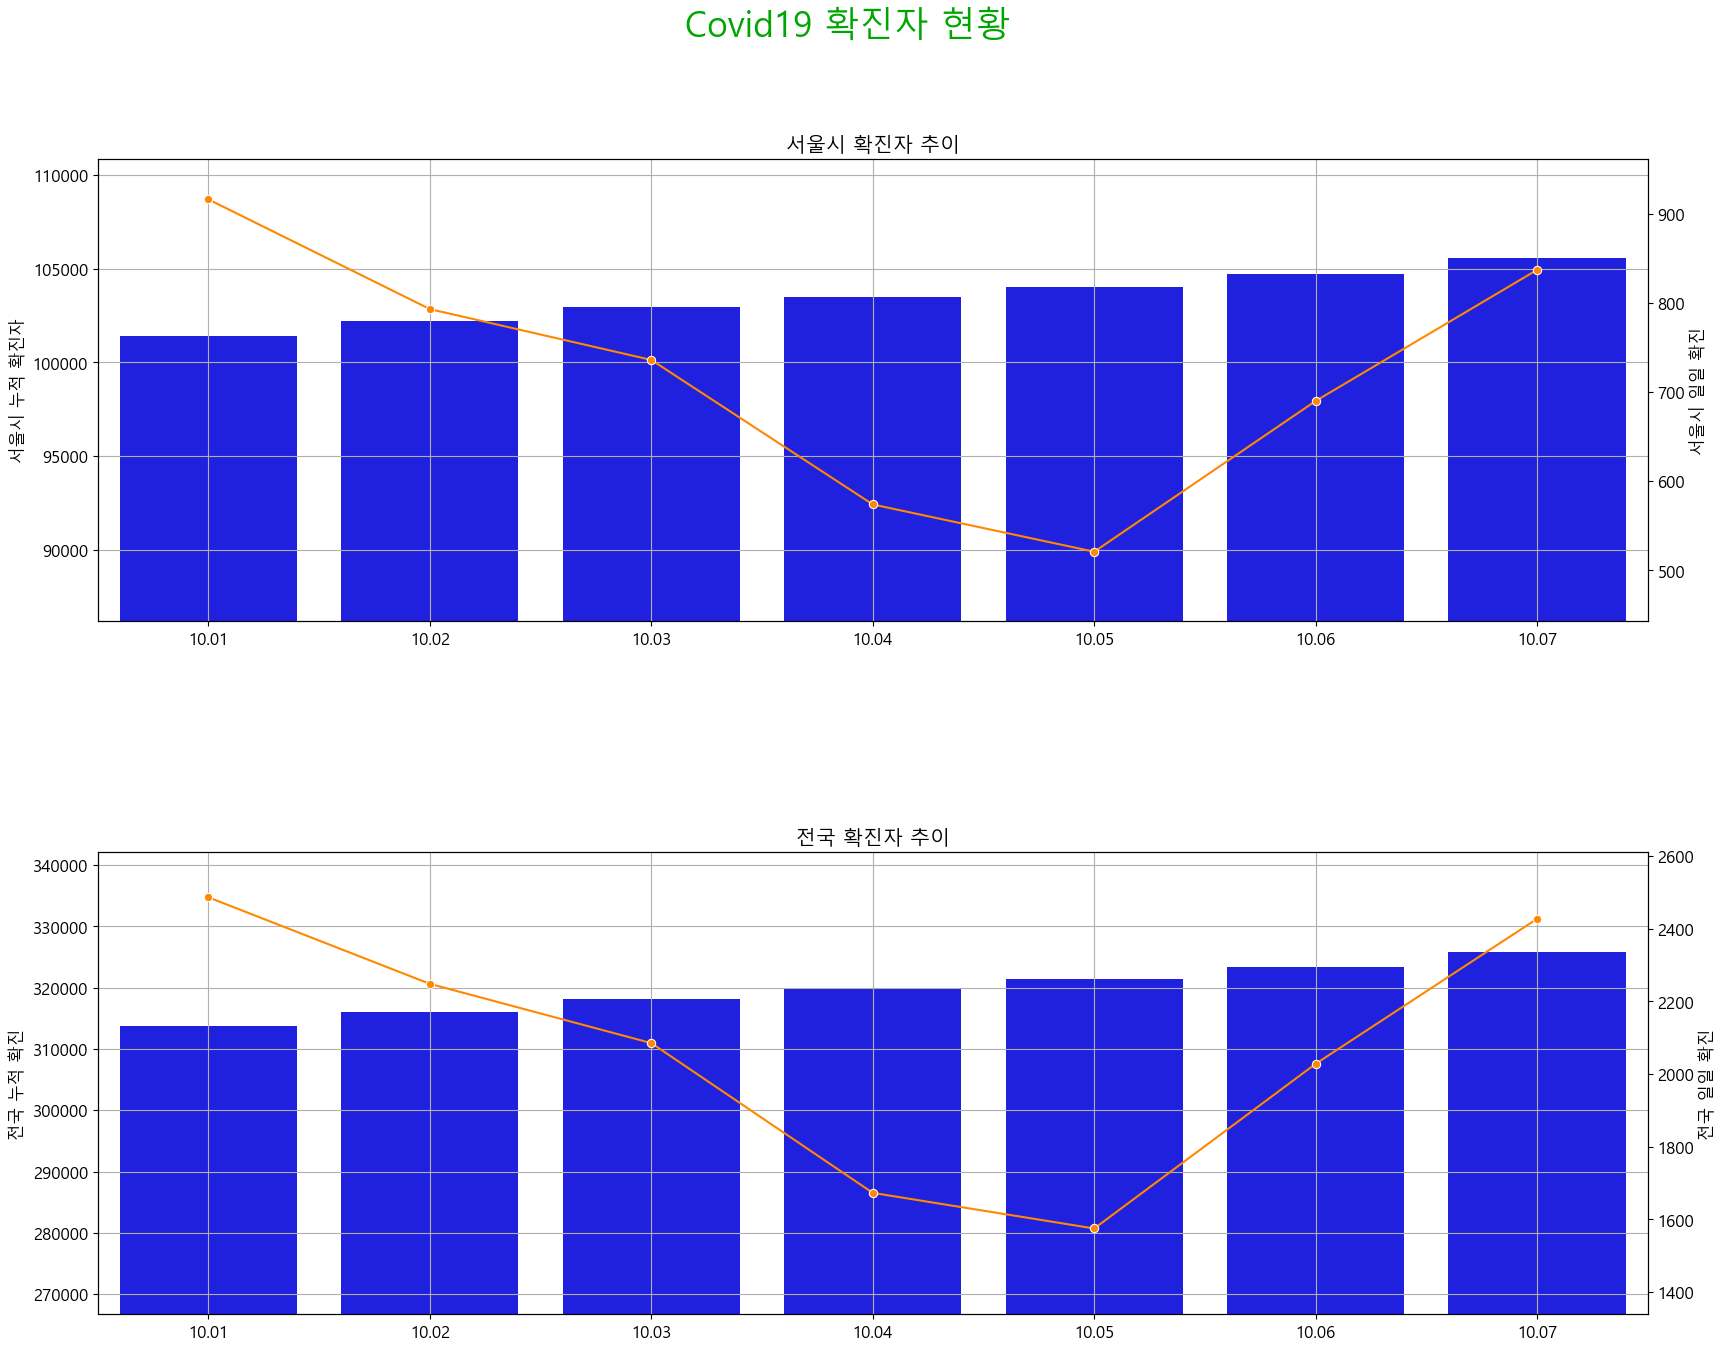

In [52]:
fig, (ax3,ax5) = plt.subplots(2, 1,figsize=(20,15))
ax4 = ax3.twinx()
ax6 = ax5.twinx()

sb.lineplot(data=df, x=x, y='서울시 일일 확진', color='#ff8800',marker='o',ax=ax4)
sb.barplot(data=df, x=x, y='서울시 누적 확진자', color='#0000ff',ax=ax3)

fig.suptitle('Covid19 확진자 현황', fontsize=25, color='#00a600')
fig.subplots_adjust(wspace=0.3,hspace=0.5)

ax3.title.set_text('서울시 확진자 추이')
ax3.set_xticklabels(xticks,fontsize=12,rotation=0)
ax5.set_xticklabels(xticks,fontsize=12,rotation=0)


ax3.set_ylim(서울시_누적_min,서울시_누적_max)
ax4.set_ylim(서울시_일일_min,서울시_일일_max)


sb.lineplot(data=df, x=x, y='전국 일일 확진', color='#ff8800',marker='o',ax=ax6)
sb.barplot(data=df, x=x, y='전국 누적 확진', color='#0000ff',ax=ax5)




ax5.title.set_text('전국 확진자 추이')
ax5.set_ylim(전국_누적_min,전국_누적_max)
ax6.set_ylim(전국_일일_min,전국_일일_max)
ax3.grid()
ax5.grid()

plt.show()
plt.close()
